# Решающие деревья. Домашнее задание

## Что нужно сделать
Решите задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [90]:
import pandas as pd
import numpy as np

df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Сделайте первичную обработку данных:

1. Выбросите колонку State.

2. Колонки International plan и Voice mail plan закодируйте следующим образом: Yes замените на 1, а No на 0.

3. Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [91]:
# ваш код здесь
df.drop('State', axis=1, inplace=True)

In [92]:
df.describe(include = 'object')

,International plan,Voice mail plan
count,3333,3333
unique,2,2
top,No,No
freq,3010,2411


In [93]:
df[['International plan', 'Voice mail plan']] = df[['International plan', 'Voice mail plan']].replace({'Yes' : 1, 'No' : 0}).astype(int)
df.Churn = df.Churn.astype(int)

Выведите на экран первые строки изменённой таблицы, чтобы проверить, что все преобразования сработали.

In [94]:
# ваш код здесь
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [95]:
# ваш код здесь
X = df.drop('Churn', axis=1)
y= df.Churn

Проверьте баланс классов. Является ли выборка сбалансированной?

[Text(0, 0, '2850'), Text(0, 0, '483')]

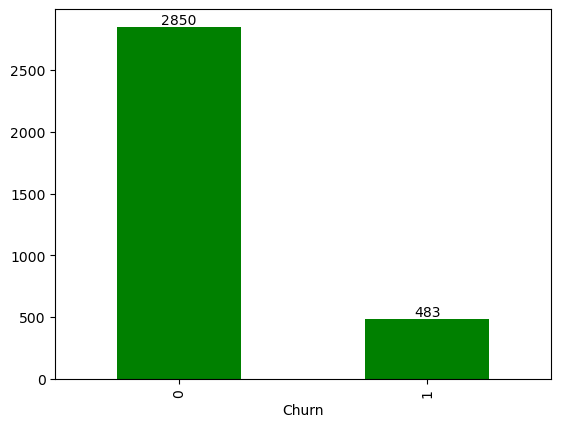

In [96]:
# ваш код здесь
fig = y.value_counts().plot(kind='bar', color = 'g')
fig.bar_label(fig.containers[0])

In [ ]:
Классы явно несбалансированы.

Разбейте данные на тренировочную и тестовую части, размер тестовой части — 30%.

In [97]:
from sklearn.model_selection import train_test_split

# ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45, train_size=0.7)

Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируйте признаки при помощи [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [98]:
from sklearn.preprocessing import StandardScaler

# ваш код здесь
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

После масштабирования признаков X_train и X_test перестали быть объектами типа pd.DataFrame, это неудобно. Приведите их снова к pd.DataFrame.

In [99]:
# ваш код здесь
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)

Обучите на тренировочных данных с параметрами по умолчанию:

1) логистическую регрессию;

2) метод опорных векторов (с kernel='linear').

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# ваш код здесь
lr = LogisticRegression()
lr.fit(X_train_scaled_df, y_train)

svc = SVC(probability=True)
svc.fit(X_train_scaled_df, y_train)

SVC(probability=True)

С помощью обученных моделей сделайте предсказание на тестовых данных.

In [141]:
from sklearn.metrics import roc_auc_score

# ваш код здесь
y_pred_lr = lr.predict(X_test_scaled_df)
y_pred_svc = svc.predict(X_test_scaled_df)

print( f'roc_auc для логистической регрессии: {roc_auc_score(y_test, y_pred_lr)}')
print( f'roc_auc для метода опорных векторов: {roc_auc_score(y_test, y_pred_svc)}')

roc_auc для логистической регрессии: 0.584229178472651
roc_auc для метода опорных векторов: 0.7358349333085231


In [172]:
lr_probs

array([0.10214825, 0.01154925, 0.06407656, 0.1243224 , 0.01965717,
       0.0417692 , 0.19370403, 0.04572518, 0.0485557 , 0.03740708,
       0.34669742, 0.02195154, 0.08299931, 0.02400257, 0.31550976,
       0.25374882, 0.21136157, 0.04664167, 0.15646968, 0.29724205,
       0.3428197 , 0.05693316, 0.38258357, 0.40398415, 0.62081919,
       0.13269798, 0.02096684, 0.03266879, 0.03077854, 0.01266724,
       0.03765257, 0.04330616, 0.40761421, 0.14471085, 0.06819694,
       0.28158871, 0.01679172, 0.00609789, 0.17986003, 0.23988281,
       0.03569   , 0.01595947, 0.22909604, 0.04743216, 0.06626811,
       0.10516114, 0.31088094, 0.01590375, 0.11037257, 0.25021597,
       0.06158762, 0.35892414, 0.4787524 , 0.80471938, 0.02451573,
       0.32242317, 0.03841027, 0.32875054, 0.01000447, 0.16106286,
       0.02639942, 0.36445528, 0.10187336, 0.05054929, 0.01816099,
       0.68465195, 0.29356459, 0.04689064, 0.05048353, 0.23621468,
       0.05088685, 0.11642902, 0.01963298, 0.18296308, 0.06871

Теперь обучите решающее дерево с параметрами по умолчанию на тренировочных данных, сделайте предсказание на тесте. Используйте метрику для оценки.

In [158]:
from sklearn.tree import DecisionTreeClassifier

# ваш код здесь
#до масштабирования
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print( f'roc_auc для дерева решений и немасштабированных данных: {roc_auc_score(y_test, y_pred_dt)}')

roc_auc для дерева решений и немасштабированных данных: 0.8479290541397771


Нужно ли масшабировать признаки для обучения решающего дерева? Проверьте это, заново разбив данные на тренировочную и тестовую части (назовите новые полученные объекты новыми названиями), и проведите обучение, предсказание и оценку метрики до масштабирования и после.

In [166]:
# ваш код здесь
#после масштабирования
dt_scaled = DecisionTreeClassifier()
dt_scaled.fit(X_train_scaled_df, y_train)
y_pred_dt_scaled = dt_scaled.predict(X_test_scaled_df)
print( f'roc_auc для дерева решений и масштабированных данных: {roc_auc_score(y_test, y_pred_dt_scaled)}')

roc_auc для дерева решений и масштабированных данных: 0.8362273853727026


Метрики roc_auc не зависит от масштаба данных, так как решающее дерево не требует масштабирования признаков, его алгоритм основан на разделении по порогам и не чувствителен к величине признаков. 

In [142]:
from sklearn.metrics import roc_curve, auc

In [177]:
lr_probs=lr.predict_proba(X_test_scaled_df)[:, 1]
svc_probs=svc.predict_proba(X_test_scaled_df)[:, 1]
dt_probs=dt_scaled.predict_proba(X_test_scaled_df)[:, 1]

# рассчитываем ROC AUC
lr_auc = roc_auc_score(y_test, lr_probs)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))

svc_auc = roc_auc_score(y_test, svc_probs)
print('SVC: ROC AUC=%.3f' % (svc_auc))

dt_auc = roc_auc_score(y_test, dt_probs)
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))

LogisticRegression: ROC AUC=0.813
SVC: ROC AUC=0.895
Decision Tree: ROC AUC=0.836


In [179]:
# рассчитываем roc-кривую
fpr_lr, tpr_lr, treshold_lr = roc_curve(y_test, lr_probs)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_svc, tpr_svc, treshold_svc = roc_curve(y_test, svc_probs)
roc_auc_svc = auc(fpr_svc, tpr_svc)

fpr_dt, tpr_dt, treshold_dt = roc_curve(y_test, dt_probs)
roc_auc_dt = auc(fpr_dt, tpr_dt)

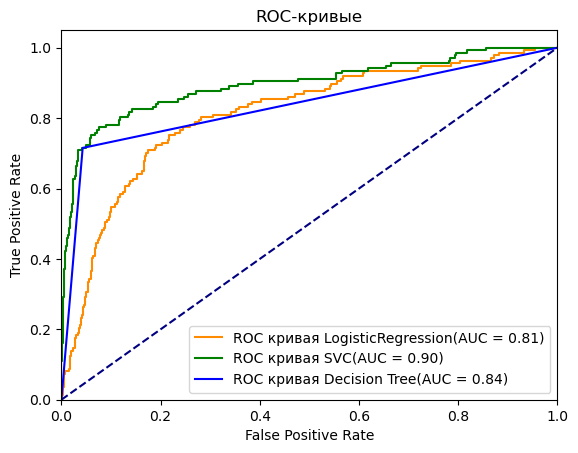

In [173]:
plt.plot(fpr_lr, tpr_lr, color='darkorange', label='ROC кривая LogisticRegression(AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_svc, tpr_svc, color='green', label='ROC кривая SVC(AUC = %0.2f)' % roc_auc_svc)
plt.plot(fpr_dt, tpr_dt, color='blue', label='ROC кривая Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые')
plt.legend(loc="lower right")
plt.show()

Какая модель справилась с решением задачи?

Все модели справились с решение задачи с достаточно хорошим результатом. По метрике roc_auc_score максимальное значение выдала модель решающего дерева, значение 0,84, но это при условии параметров по умолчанию для логистической регрессии и метода опорных векторов. Однако при анализе roc кривой в зависимости от порогового значения лучшие показатели дала модель опорных векторов, максимальная roc_auc 0,895 и auc 0.9. На втором месте модель решаещего дерева, и на последнейм логистическая регрессия.